**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [9]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [10]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [11]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [12]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [13]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [15]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [16]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [20]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [22]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [24]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [26]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [28]:
# Answer here
#定義一個新的 Prompt
my_prompt = ["Explain the concept of 'Black Holes' to a 10-year-old using space analogies."]

#使用預設模型 (gemini-2.5-flash-lite)
print(f"--- Model: {MODEL_NAME} ---")
response_lite, logs_lite = prompt_gemini(input_prompt=my_prompt, with_tokens_info=True)
from IPython.display import display, Markdown
display(Markdown(response_lite))
print(logs_lite)

#使用不同的模型gemini-2.5-pro
OTHER_MODEL = "gemini-2.5-pro" 
print(f"\n--- Model: {OTHER_MODEL} ---")
response_other, logs_other = prompt_gemini(input_prompt=my_prompt, model_name=OTHER_MODEL, with_tokens_info=True)
display(Markdown(response_other))
print(logs_other)

--- Model: gemini-2.5-flash-lite ---


Imagine space is like a giant trampoline, and stars and planets are like balls placed on it. The heavier the ball, the more it makes the trampoline dip.

Now, a **black hole** is like a super, super, **super heavy ball** that makes the trampoline dip so much that it creates a **bottomless pit**.

Here's what makes it so special:

*   **It's like a cosmic vacuum cleaner:** If anything gets too close to this bottomless pit – like a tiny pebble or even a whole spaceship – it gets sucked in! And once it's in, it can't get out.
*   **It's invisible, but we know it's there:** You can't actually *see* a black hole because it's so good at sucking in light. Light is like the fastest thing in the universe, but even light can't escape a black hole's pull. It's like trying to shine a flashlight into that bottomless pit – the light just disappears!
*   **How do we know they exist then?** We see the stuff *around* the black hole. Imagine if you saw a bunch of leaves swirling around a drain, even though you can't see the drain itself. We see stars and gas getting pulled towards where we think a black hole is, and that tells us it's there.
*   **They're not really "holes" in the way you might think:** It's more like a place where gravity is incredibly, unbelievably strong. Gravity is that invisible force that keeps you on the ground and makes things fall. A black hole has so much gravity packed into a tiny space that it's like the ultimate gravity monster!
*   **They're born from giant stars:** When a really, really big star runs out of fuel, it can collapse in on itself. Imagine a giant balloon popping, but instead of just deflating, it squishes down smaller and smaller until it becomes this super dense, super heavy thing – a black hole!

So, think of a black hole as a super-powerful, invisible gravity trap in space that sucks everything in, even light! It's one of the most mysterious and amazing things in the universe.

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 28, 'output_tokens': 468}

--- Model: gemini-2.5-pro ---


Of course! Imagine you and I are floating in a giant spaceship, looking out the window at the universe. Here's how we can understand black holes.

### 1. How a Black Hole is Born: The Super-Star Balloon

Imagine the biggest, most massive star you can think of. Let's pretend it's a giant, glowing balloon, bigger than a whole city.

*   For its whole life, this star-balloon is full of fiery energy pushing outwards, which keeps it big and round.
*   But eventually, the star runs out of fuel. The fire inside goes out.
*   When that happens, there's nothing left to hold it up. The balloon doesn't just deflate... **POP!** It collapses in on itself in a split second.

Now, imagine taking that entire giant balloon and squishing it down, and down, and down, until it's smaller than a single marble.

That's how a black hole is born! It's all the stuff from a giant star packed into a super-duper tiny spot.

### 2. What a Black Hole Does: The Universe's Trampoline

Think of space as a giant, stretchy trampoline.

*   A normal planet, like Earth, is like a bowling ball. It sits on the trampoline and makes a little dip.
*   Our Sun is heavier, so it's like a bigger bowling ball that makes a deeper dip. That's gravity! The planets are like little marbles rolling around in the dip the Sun makes.

Now, a **black hole** is different. It's like taking that tiny, squished marble we made and realizing it's so heavy that it **rips a hole right through the trampoline.**

It's not just a dip anymore; it's a bottomless pit. Anything that gets too close—other stars, planets, even light—doesn't just roll around it. It falls into the hole and can't get out.

### 3. Why They Are "Black": The Unbeatable Waterfall

Imagine light is the fastest speedboat in the entire universe. Nothing can go faster.

Now, picture a giant waterfall. The river leading to it is like the gravity of a black hole.

*   Far away from the waterfall, the speedboat (light) can zip around easily.
*   But as it gets closer, the river's current gets stronger and stronger, pulling it toward the edge.
*   Eventually, there's a point—a line in the water—where the waterfall's pull is so strong that even the fastest speedboat in the universe can't escape it. **WHOOSH!** Over the edge it goes.

That's what a black hole does to light. Its gravity is so powerful that once light crosses that "point of no return," it gets pulled in forever. And if no light can escape from it, we can't see it. It just looks like a black spot in space.

---

**So, to sum it up:**

A **black hole** is what's left over when a giant star collapses into a tiny, super-heavy point. This point has so much gravity that it's like a **hole in the trampoline of space**, and its pull is so strong that it's like a **waterfall that even the fastest speedboat (light) can't escape.**

They aren't space vacuum cleaners, though! They don't go around sucking everything up. You have to get very, very close to fall in. From far away, they're just another amazing, mysterious thing floating in our incredible universe.

{'model': 'gemini-2.5-pro', 'input_tokens': 28, 'output_tokens': 766}


## 4.Discuss what would happen if you change the system prompt.
1. 不同模型的差異 (Differences between models):

Gemini 2.5 Flash-Lite:

特點: 回答較為簡潔（約 468 tokens），結構清晰，使用了條列式重點。

內容: 它使用了經典的「彈跳床」和「吸塵器」比喻，能快速讓讀者理解核心概念，適合需要快速回應或簡單解釋的場景。

Gemini 2.5 Pro:

特點: 回答更為詳盡（約 744 tokens），並且更有敘事性，將解釋分成了幾個章節（如「超級恆星的擠壓」、「無底深淵」等）。

內容: 它不僅使用了比喻，還深入解釋了背後的機制（例如重力與爆炸的「宇宙比腕力」）。更有趣的是，它還主動糾正了「黑洞像吸塵器」的常見誤解，展現了更強的推理與教學能力。

2. 系統提示詞 (System Prompt) 的影響:

目前的設定: 使用 "You are a helpful assistant" 會讓模型保持友善、客觀且樂於助人的語氣，適合一般教學。

如果改變設定:

若改為 "You are a sci-fi horror writer" (你是科幻恐怖作家)，模型可能會強調黑洞的黑暗、吞噬一切的絕望感和「義大利麵化」的恐怖過程。

若改為 "You are a 5-year-old" (你是五歲小孩)，模型可能會用更童言童語的方式，例如「黑洞就像宇宙的大嘴巴，把星星糖果都吃掉了」。

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [31]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [32]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [33]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [34]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [36]:
# Answer here
from pydantic import BaseModel

# 定義你的新 Schema (食譜結構)
class Ingredient(BaseModel):
    name: str
    amount: str
    unit: str

class RecipeStep(BaseModel):
    step_number: int
    instruction: str

class Recipe(BaseModel):
    dish_name: str
    cuisine_type: str
    difficulty: str
    prep_time: str
    ingredients: list[Ingredient]
    steps: list[RecipeStep]

# 定義 Prompt
recipe_prompt = ["Give me a traditional recipe for Taiwanese Beef Noodle Soup."]

# 呼叫 Gemini
print("Generating Recipe Structure...")
recipe_response_text = prompt_gemini(input_prompt=recipe_prompt, schema=Recipe)

# 解析並印出結果
import json
if recipe_response_text:
    recipe_data = json.loads(recipe_response_text)
    print(json.dumps(recipe_data, indent=2, ensure_ascii=False))
else:
    print("Failed to generate structure.")

Generating Recipe Structure...
{
  "dish_name": "Taiwanese Beef Noodle Soup",
  "cuisine_type": "Taiwanese",
  "difficulty": "Medium",
  "prep_time": "30 minutes (plus 2-3 hours simmering)",
  "ingredients": [
    {
      "name": "Beef shank or brisket",
      "amount": "1",
      "unit": "kg"
    },
    {
      "name": "Beef broth",
      "amount": "2",
      "unit": "liters"
    },
    {
      "name": "Soy sauce",
      "amount": "1/2",
      "unit": "cup"
    },
    {
      "name": "Shaoxing wine",
      "amount": "1/4",
      "unit": "cup"
    },
    {
      "name": "Rock sugar",
      "amount": "2",
      "unit": "tablespoons"
    },
    {
      "name": "Star anise",
      "amount": "3",
      "unit": "pieces"
    },
    {
      "name": "Cinnamon stick",
      "amount": "1",
      "unit": "piece"
    },
    {
      "name": "Bay leaves",
      "amount": "2",
      "unit": "pieces"
    },
    {
      "name": "Dried chili peppers",
      "amount": "2-3",
      "unit": "pieces"
    },

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [40]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [41]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [43]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [45]:
import os
import langextract as lx

# 我們重新定義 grounded_info_extraction 函式來修復編碼問題
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text
        max_workers=max_workers,         # Parallel processing for speed
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    
    # 加入 encoding="utf-8" ---
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding="utf-8") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)
    # -------------------------------------

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [46]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

LangExtract: model=gemini-2.5-flash-lite, current=3,199 chars, processed=0 chars:  [00:02]


Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 498.85 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|▉| 8.58k/8.58k [00:00<00:00, 451kB/

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [47]:
import json

# 加入 encoding="utf-8" 來正確讀取檔案
with open("./results/info_extractions/review_extraction_example.jsonl", "r", encoding="utf-8") as f:
    try:
        content_extracted_raw = json.load(f)
    except json.JSONDecodeError:
        # 萬一它是真的 JSON Lines 格式 (一行一個 JSON)，則用此備案讀取
        f.seek(0)
        content_extracted_raw = [json.loads(line) for line in f]

content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [48]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [50]:
# Answer here

from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import textwrap
import pymupdf
import os

#準備影評文字 (來源: Roger Ebert 對《黑暗騎士》的評論)
review_text = """
Christopher Nolan's "The Dark Knight" is a haunted film that leaps beyond its origins and becomes an engrossing tragedy. It creates characters we come to care about. That's because of the performances, of course. Heath Ledger's Joker is a screen presence so powerful that he takes over the movie.

"The Dark Knight" is not a simplistic tale of good and evil. Batman is good, yes, The Joker is evil, yes. But Batman poses a more complex puzzle than usual: The citizens of Gotham City are in an uproar, calling him a vigilante and blaming him for the deaths of policemen and others. And the Joker is more than a villain. He is a Mephistopheles whose actions are fiendishly designed to pose moral dilemmas for his enemies.

The special effects are extraordinary. They focus on the expected explosions and catastrophes, and have some superb, elaborate chase scenes. The movie was shot on location in Chicago, but it avoids such familiar landmarks as Marina City, the Wrigley Building or the skyline.

It is a film that understands the allure of darkness, sees how it can efficiently spread, and then presents us with the facts regarding the realities of honor, strength, and influence.
"""

#將影評儲存為 PDF
pdf_filename = "./data/documents/the_dark_knight_review.pdf"
os.makedirs(os.path.dirname(pdf_filename), exist_ok=True)

try:
    c = canvas.Canvas(pdf_filename, pagesize=letter)
    width, height = letter
    text_object = c.beginText(40, height - 40)
    text_object.setFont("Helvetica", 12)
    
    # 自動換行
    wrapper = textwrap.TextWrapper(width=80)
    for paragraph in review_text.strip().split('\n'):
        lines = wrapper.wrap(text=paragraph)
        for line in lines:
            text_object.textLine(line)
        text_object.textLine("") # 段落間空行
        
    c.drawText(text_object)
    c.save()
    print(f"✓ 成功建立 PDF 檔案: {pdf_filename}")
except Exception as e:
    print(f"建立 PDF 時發生錯誤 (請確認已安裝 reportlab): {e}")

#讀取 PDF 並格式化文字
formatted_text_bonus = ""
try:
    doc = pymupdf.open(pdf_filename)
    for i, page in enumerate(doc):
        text = page.get_text("text")
        formatted_text_bonus += f'**Page {i + 1}**\n"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ 成功讀取並提取文字")
except Exception as e:
    print(f"讀取 PDF 時發生錯誤: {e}")

#執行 LangExtract 資訊提取 ---
#直接使用前面定義好的 prompt, examples 和 grounded_info_extraction 函式
if formatted_text_bonus:
    print("\n開始執行資訊提取...")
    html_content_bonus = grounded_info_extraction(
        formatted_text_bonus, 
        prompt, 
        examples, 
        "dark_knight_extraction"
    )

✓ 成功建立 PDF 檔案: ./data/documents/the_dark_knight_review.pdf
✓ 成功讀取並提取文字

開始執行資訊提取...


LangExtract: model=gemini-2.5-flash-lite, current=1,197 chars, processed=0 chars:  [00:02]


Extracted 10 entities:

• opinion_statement: 'a haunted film'
  - subject: The Dark Knight
  - sentiment: Positive
  - key_phrase: haunted
• opinion_statement: 'becomes an engrossing tragedy'
  - subject: The Dark Knight
  - sentiment: Positive
  - key_phrase: engrossing tragedy
• opinion_statement: 'creates characters we come to care about'
  - subject: The Dark Knight
  - sentiment: Positive
  - key_phrase: come to care about
• opinion_statement: 'Heath Ledger's Joker is a screen presence so powerful that he takes over the movie'
  - subject: Heath Ledger's Joker
  - sentiment: Positive
  - key_phrase: so powerful that he takes over the movie
• opinion_statement: 'not a simplistic tale of good and evil'
  - subject: The Dark Knight
  - sentiment: Positive
  - key_phrase: not a simplistic tale
• opinion_statement: 'poses a more complex puzzle than usual'
  - subject: Batman
  - sentiment: Positive
  - key_phrase: more complex puzzle
• opinion_statement: 'the actions are fiendishly des

LangExtract: Saving to results\info_extractions\dark_knight_extraction.jsonl: 1 docs [00:00, 1000.31 docs/s]

✓ Saved 1 documents to results\info_extractions\dark_knight_extraction.jsonl



LangExtract: Loading results\info_extractions\dark_knight_extraction.jsonl: 100%|█▉| 5.02k/5.02k [00:00<00:00, 372kB/s]

✓ Loaded 1 documents from results\info_extractions\dark_knight_extraction.jsonl
✓ Visualization saved to ./results/info_extractions/dark_knight_extraction_vis.html


## Discussion regarding the quality of extracted information:

Extraction Quality (提取品質):

模型成功識別出了主要的觀點陳述，例如 "The special effects are extraordinary" (特效非凡) 和 "Heath Ledger's Joker is a screen presence so powerful" (希斯萊傑的小丑具有強大的銀幕存在感)。

它也能準確捕捉 Audience Impact (觀眾影響)，例如 "creates characters we come to care about" (創造了我們關心的角色)，這顯示模型理解文本中「情感共鳴」的部分。

Grounding (溯源能力):

langextract 的 Grounding 機制非常有效。提取出的每一個屬性（如 Sentiment 或 Key Phrase）都能精確對應到原文中的具體字句。這避免了 LLM 常見的「幻覺」問題，確保了分析結果的可信度。

Potential Improvements (改進空間):

Schema Refinement: 目前的 Prompt 只有 opinion_statement 和 audience_impact 兩類。對於影評，我們可以增加更多類別，例如 technical_aspect (針對攝影、特效) 或 narrative_element (針對劇情、節奏)，這樣可以讓結構化數據更豐富。

Domain-Specific Examples (領域範例): 雖然目前的 Few-shot 範例有效，但如果能加入針對「動作片」或「心理驚悚片」的特定範例，模型在提取像 "moral dilemmas" (道德困境) 這類抽象概念時會更加精準。

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [53]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [54]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\USER\AppData\Local\Temp\ipykernel_58636\2000596105.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\USER\AppData\Local\Temp\ipykernel_58636\2000596105.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [55]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [56]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [57]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [58]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [59]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [60]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
299,10299,@johnaugust @clmazin I was so looking forward ...,anger,0.491,"[values=[-0.009324027, -0.013910245, 0.0099156...","[-0.009324027, -0.013910245, 0.00991563, -0.09..."
73,10073,Absolutely fuming I've just scratched all my c...,anger,0.750,"[values=[0.0053318217, 0.0056086117, 0.0132205...","[0.0053318217, 0.0056086117, 0.0132205635, -0...."
542,10542,@Sophiejulia @CalebAtChipotle @calebpressleyxo...,anger,0.438,"[values=[-0.028057763, 0.01041207, 0.01039062,...","[-0.028057763, 0.01041207, 0.01039062, -0.0908..."
375,10375,@cc_yandian @HillaryClinton her team must draw...,anger,0.521,"[values=[-0.018429024, 0.008782404, -0.0016314...","[-0.018429024, 0.008782404, -0.0016314974, -0...."
832,10832,@JaredLeto Jared + #snap? 💘,anger,0.188,"[values=[-0.0053038164, 0.012617927, 0.0109605...","[-0.0053038164, 0.012617927, 0.010960508, -0.0..."
...,...,...,...,...,...,...
3527,40700,@hotelplanner I stayed at a hotel who packed ...,sadness,0.271,"[values=[-0.02474685, 0.009266506, -0.00480012...","[-0.02474685, 0.009266506, -0.004800123, -0.04..."
3603,40776,#picoftheday : How...why... Really... !!\n ...,sadness,0.146,"[values=[-0.01003078, 0.0065011415, -0.0044480...","[-0.01003078, 0.0065011415, -0.004448022, -0.0..."
3354,40527,Cam cannot be serious with that IG post and th...,sadness,0.396,"[values=[-0.0012211809, -0.0059653274, -0.0159...","[-0.0012211809, -0.0059653274, -0.015902182, -..."
3350,40523,@Fatumoriginal there's no sitcom better! If u ...,sadness,0.396,"[values=[-0.02437667, -0.017877452, -0.0046409...","[-0.02437667, -0.017877452, -0.004640938, -0.0..."


In [61]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
224,30853,@GameGrumps THANK YOU SO MUCH FOR COMING TO DE...,joy,0.804,"[values=[-0.02887108, -0.022832144, -0.0155585...","[-0.02887108, -0.022832144, -0.015558547, -0.0..."
182,21245,Hillary Clinton looked the other way to the Sa...,fear,0.479,"[values=[-0.002730555, 0.00785198, -0.01620275...","[-0.002730555, 0.00785198, -0.016202757, -0.06..."
26,10883,@LaureEve I am sitting here wrapped in a fluff...,anger,0.250,"[values=[0.0012991744, -0.0076246005, -0.01756...","[0.0012991744, -0.0076246005, -0.017562948, -0..."
241,30870,@Communism_Kills i get the subway melt and mak...,joy,0.380,"[values=[0.0015269195, -0.003343023, 0.0012894...","[0.0015269195, -0.003343023, 0.0012894134, -0...."
83,10940,Lol little things like that make me so angry x,anger,0.604,"[values=[0.013566949, -0.00450142, 0.004378448...","[0.013566949, -0.00450142, 0.004378448, -0.054..."
307,40820,MC: what are you listen to these days?\nBogum:...,sadness,0.583,"[values=[0.019539252, 0.005026681, 0.003033225...","[0.019539252, 0.005026681, 0.0030332252, -0.08..."
87,21150,@1johndes ball watching &amp; Rojo'd header wa...,fear,0.475,"[values=[0.005264606, 0.012534002, -0.01148543...","[0.005264606, 0.012534002, -0.011485438, -0.05..."
325,40838,@GolfStrat out of Rory starts. What would your...,sadness,0.343,"[values=[0.03251419, -0.0120953005, 0.00982391...","[0.03251419, -0.0120953005, 0.009823919, -0.06..."
259,30888,@tomlinmayniac starting my new challenge ! A g...,joy,0.625,"[values=[-0.019158924, 0.026136786, 0.00889167...","[-0.019158924, 0.026136786, 0.008891672, -0.08..."
10,10867,@Yoshi_OnoChin can you please not have Canadia...,anger,0.646,"[values=[-0.009779071, -0.020864518, -0.024792...","[-0.009779071, -0.020864518, -0.024792155, -0...."


In [62]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [63]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [64]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [65]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

D:\anaconda\envs\ai_cup\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [68]:
# Answer here
import pandas as pd
import numpy as np
import umap
import plotly.express as px
import os

data_path_train = "./data/train_df_sample_embeddings.pkl"
data_path_test = "./data/test_df_sample_embeddings.pkl"

if os.path.exists(data_path_train) and os.path.exists(data_path_test):
    print("正在載入 Embedding 數據...")
    train_df_new = pd.read_pickle(data_path_train)
    test_df_new = pd.read_pickle(data_path_test)
    combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)
    
    # 檢查數據
    print(f"數據載入成功，共 {len(combined_df)} 筆資料。")

    # 準備 UMAP 輸入
    # 將 embedding 列表轉換為 numpy 陣列
    X_embeddings = np.array(combined_df['embeddings_values'].tolist())

    # --- 執行 UMAP 3D 降維 ---
    print("正在執行 UMAP 3D 降維...")
    # n_components=3 代表降維到 3 個維度 (x, y, z)
    reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=42)
    embedding_3d = reducer_3d.fit_transform(X_embeddings)

    #
    df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
    df_plot_3d['emotion'] = combined_df['emotion']
    df_plot_3d['text'] = combined_df['text']
    # 截斷過長的文字以便在圖表中顯示
    df_plot_3d['text_display'] = df_plot_3d['text'].apply(lambda x: x[:100] + "..." if len(x) > 100 else x)
    df_plot_3d['intensity'] = combined_df['intensity']

    print("正在繪製 3D 圖表...")
    fig = px.scatter_3d(
        df_plot_3d,
        x='UMAP1',
        y='UMAP2',
        z='UMAP3',
        color='emotion',
        hover_data=['text_display', 'intensity'],
        title='3D UMAP Projection of Gemini Text Embeddings',
        opacity=0.7,
        size_max=5,
        width=900,
        height=700
    )

    fig.update_traces(marker=dict(size=3))
    fig.show()

else:
    print("錯誤：找不到 Embedding 數據檔案。")
    print("請確保您已經執行了 Lab Notebook 2.4 節中生成並儲存 'train_df_sample_embeddings.pkl' 的程式碼區塊。")

正在載入 Embedding 數據...
數據載入成功，共 200 筆資料。
正在執行 UMAP 3D 降維...


D:\anaconda\envs\ai_cup\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



正在繪製 3D 圖表...


---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [81]:
# 嘗試導入必要的模組
try:
    # 舊版/通用路徑
    from langchain.text_splitter import RecursiveCharacterTextSplitter
except ImportError:
    # 新版獨立套件路徑
    from langchain_text_splitters import RecursiveCharacterTextSplitter

from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

print("✅ 所有模組導入成功！")

✅ 所有模組導入成功！


In [83]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [85]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 731, 'output_tokens': 183}


The key challenges in realizing AGI's full potential include:

*   **Learning from Diverse Data:** Unlike narrow AI, AGI needs to learn from unstructured and diverse data sources, which is a significant hurdle.
*   **Computational Power:** The immense computational resources required to process and learn from vast amounts of data present a considerable challenge.
*   **Ethical Concerns:** Ensuring AGI systems align with human values, addressing issues of autonomy, privacy, and control are crucial.
*   **Job Displacement:** The potential for AGI-driven automation to cause job losses necessitates strategies for workforce transition and retraining.
*   **Security Risks:** Advanced AI systems could be vulnerable to hacking or misuse, posing large-scale security threats.
*   **Unpredictable Behavior:** The complexity of AGI can lead to actions that are difficult to predict or control, potentially resulting in unintended consequences.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [94]:
# Answer here
from IPython.display import display, Markdown
import time
import sys

# --- 修改版：加入分批處理與延遲的檢索器函式 ---

def load_and_retrieve_docs(url):
    print(f"1. 正在讀取網頁: {url} ...")
    loader = WebBaseLoader(web_paths=(url,), bs_kwargs=dict()) 
    docs = loader.load()
    
    print("2. 正在分割文本...")
    # 稍微加大 chunk_size 以減少總 chunk 數量
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=150)
    splits = text_splitter.split_documents(docs)
    print(f"   -> 共分割成 {len(splits)} 個區塊。")
    
    # 建立 Embeddings 模型
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    
    # 初始化一個空的 Chroma 資料庫
    vectorstore = Chroma(embedding_function=embeddings)
    
    # --- 關鍵修改：分批加入文件 (Batching) ---
    batch_size = 5  # 每次只處理 5 個區塊
    total_splits = len(splits)
    
    print("3. 正在分批建立向量資料庫 (為避免 429 錯誤，速度會較慢)...")
    
    for i in range(0, total_splits, batch_size):
        batch = splits[i : i + batch_size]
        print(f"   處理批次 {i//batch_size + 1}: 區塊 {i} 到 {min(i + batch_size, total_splits)} ...", end="\r")
        
        try:
            vectorstore.add_documents(batch)
            # 每批處理完後，強制休息 5 秒鐘
            time.sleep(5) 
        except Exception as e:
            print(f"\n   ❌ 批次處理失敗: {e}")
            print("   請等待一分鐘後再試...")
            time.sleep(60) # 如果失敗，等待更久再試
            try:
                vectorstore.add_documents(batch)
            except:
                print("   跳過此批次。")
                
    print("\n✅ 向量資料庫建立完成！")
    return vectorstore.as_retriever()

# --- 其他函式保持不變 ---

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context. If the answer is not in the context, state that you don't know."
    formatted_prompt = [f"Question: {question}\n\nContext: {context}"]
    
    response = prompt_gemini(
        input_prompt=formatted_prompt, 
        system_instruction=system_prompt, 
        temperature=0.0
    )
    return response

def rag_chain(question, retriever):
    print(f"4. 正在檢索相關文檔: '{question}'...")
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    
    print("5. 正在生成回答...")
    return gemini_llm(question, formatted_context)

# --- 執行 Exercise 5 測試 ---

target_url = "https://en.wikipedia.org/wiki/James_Webb_Space_Telescope"

try:
    # 使用新的分批處理函式
    my_retriever = load_and_retrieve_docs(target_url)

    my_question = "When was the James Webb Space Telescope launched and what is its primary mission?"

    rag_result = rag_chain(question=my_question, retriever=my_retriever)

    print("\n--- RAG Answer ---")
    display(Markdown(rag_result))
    
except Exception as e:
    print(f"\n發生嚴重錯誤: {e}")

1. 正在讀取網頁: https://en.wikipedia.org/wiki/James_Webb_Space_Telescope ...
2. 正在分割文本...
   -> 共分割成 147 個區塊。
3. 正在分批建立向量資料庫 (為避免 429 錯誤，速度會較慢)...


C:\Users\USER\AppData\Local\Temp\ipykernel_58636\2804107057.py:23: LangChainDeprecationWarning:

The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the `langchain-chroma package and should be used instead. To use it run `pip install -U `langchain-chroma` and import as `from `langchain_chroma import Chroma``.



   處理批次 10: 區塊 45 到 50 ...
   ❌ 批次處理失敗: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerUserPerProjectPerModel-FreeTier"
}
]
   請等待一分鐘後再試...
   跳過此批次。
   處理批次 11: 區塊 50 到 55 ...
   ❌ 批次處理失敗: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To mo

KeyboardInterrupt: 

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [109]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|██████████████████████████████          | 15/20 [00:13<00:04,  1.10it/s]

Rate limit of 15 requests per minute reached. Waiting for 46.53 seconds.


Processing samples for emotion: fear...:  50%|████████████████████▌                    | 10/20 [00:09<00:09,  1.09it/s]

Rate limit of 15 requests per minute reached. Waiting for 46.40 seconds.


Processing samples for emotion: joy...:  25%|██████████▊                                | 5/20 [00:04<00:12,  1.17it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.93 seconds.


Processing samples for emotion: joy...:  95%|███████████████████████████████████████▉  | 19/20 [01:04<00:01,  1.06s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 20.918521686s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|                                               | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 31.30 seconds.


Processing samples for emotion: sadness...:  75%|████████████████████████████▌         | 15/20 [00:45<00:05,  1.03s/it]

Rate limit of 15 requests per minute reached. Waiting for 46.05 seconds.


Processing samples for emotion: sadness...: 100%|██████████████████████████████████████| 20/20 [01:36<00:00,  4.83s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.41      0.60      0.49        20
        fear       0.89      0.40      0.55        20
         joy       0.61      0.85      0.71        20
     sadness       0.57      0.40      0.47        20

    accuracy                           0.56        80
   macro avg       0.62      0.56      0.56        80
weighted avg       0.62      0.56      0.56        80



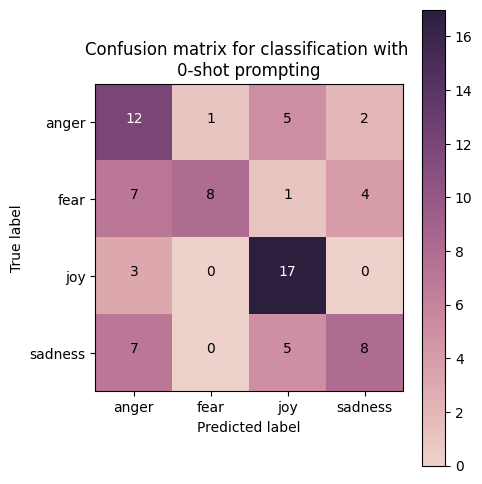

In [114]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @johnaugust @clmazin I was so looking forward to @ABCDesignated. Then it opened with a #stuartspecial. I literally yelled at my tv. #umbrage
Class: anger

Text: Wazza blocks Carrick's shot and then misses a sitter that Memphis, who was ready beside him, surely wouldve buried. Good start lol #MUFC
Class: fear

Text: Accept the challenges, So that you may feel the exhilaration of victory.\n\nTOMIHO IpaglabanMo TapingDay2
Class: joy

Text: Some of these people at this protest are just there for the adrenaline rush. #depressing
Class: sadness




Processing samples for emotion: anger...:  45%|██████████████████▍                      | 9/20 [00:06<00:07,  1.40it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 20.967530699s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|██████████████████████████████          | 15/20 [00:26<00:07,  1.45s/it]

Rate limit of 15 requests per minute reached. Waiting for 33.75 seconds.


Processing samples for emotion: fear...:  25%|██████████▌                               | 5/20 [00:05<00:14,  1.01it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 17.356644374s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|████████████████████▌                    | 10/20 [00:24<00:19,  1.99s/it]

Rate limit of 15 requests per minute reached. Waiting for 30.06 seconds.


Processing samples for emotion: joy...:   5%|██▏                                        | 1/20 [00:01<00:19,  1.00s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 15.265304185s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██████████▊                                | 5/20 [00:20<00:43,  2.90s/it]

Rate limit of 15 requests per minute reached. Waiting for 28.04 seconds.


Processing samples for emotion: joy...:  65%|███████████████████████████▎              | 13/20 [00:56<00:11,  1.71s/it]

Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}


Processing samples for emotion: joy...:  70%|█████████████████████████████▍            | 14/20 [00:58<00:10,  1.74s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 18.142935868s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|                                               | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 29.31 seconds.


Processing samples for emotion: sadness...:  50%|███████████████████                   | 10/20 [00:38<00:13,  1.31s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 18.165543209s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:  75%|████████████████████████████▌         | 15/20 [00:58<00:10,  2.14s/it]

Rate limit of 15 requests per minute reached. Waiting for 30.50 seconds.


Processing samples for emotion: sadness...: 100%|██████████████████████████████████████| 20/20 [01:33<00:00,  4.67s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 63.75%
              precision    recall  f1-score   support

       anger       0.52      0.65      0.58        20
        fear       0.85      0.55      0.67        20
         joy       0.71      0.85      0.77        20
     sadness       0.56      0.50      0.53        20

    accuracy                           0.64        80
   macro avg       0.66      0.64      0.64        80
weighted avg       0.66      0.64      0.64        80



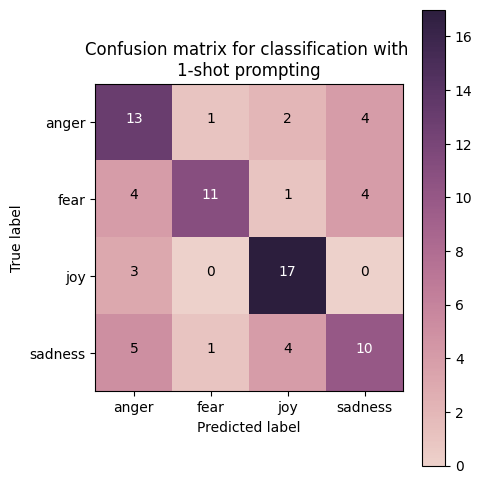

In [115]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @johnaugust @clmazin I was so looking forward to @ABCDesignated. Then it opened with a #stuartspecial. I literally yelled at my tv. #umbrage
Class: anger

Text: @gerfingerpoken #rage?? The #CrookedCourt said #rage MANY times to explain away the brutal killings of #Petits by #Hayes &amp; #Komisarjevsky
Class: anger

Text: @johnaugust @clmazin I was so looking forward to @ABCDesignated. Then it opened with a #stuartspecial. I literally yelled at my tv. 
Class: anger

Text: .@DIVAmagazine than straight people. Even the arse straight guys who think that means a threesome is fine.  
Class: anger

Text: Get to work and there's a fire drill. #fire #burning #outthere #inthedark
Class: anger

Text: Wazza blocks Carrick's shot and then misses a sitter that Memphis, who was ready beside him, surely wo

Processing samples for emotion: anger...:  30%|████████████▎                            | 6/20 [00:05<00:12,  1.09it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 17.836330301s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|██████████████████████████████          | 15/20 [00:28<00:05,  1.13s/it]

Rate limit of 15 requests per minute reached. Waiting for 31.12 seconds.


Processing samples for emotion: fear...:  10%|████▏                                     | 2/20 [00:01<00:14,  1.21it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 17.140807533s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|████████████████████▌                    | 10/20 [00:24<00:13,  1.36s/it]

Rate limit of 15 requests per minute reached. Waiting for 30.89 seconds.


Processing samples for emotion: fear...:  90%|████████████████████████████████████▉    | 18/20 [01:04<00:03,  1.96s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 14.325826852s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██████████▊                                | 5/20 [00:18<01:15,  5.02s/it]

Rate limit of 15 requests per minute reached. Waiting for 14.34 seconds.


Processing samples for emotion: joy...:  70%|█████████████████████████████▍            | 14/20 [00:40<00:07,  1.21s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 15.692897339s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|                                               | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 32.26 seconds.


Processing samples for emotion: sadness...:  50%|███████████████████                   | 10/20 [00:41<00:13,  1.36s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 14.216887218s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:  75%|████████████████████████████▌         | 15/20 [01:02<00:10,  2.16s/it]

Rate limit of 15 requests per minute reached. Waiting for 30.13 seconds.


Processing samples for emotion: sadness...: 100%|██████████████████████████████████████| 20/20 [01:36<00:00,  4.81s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 66.25%
              precision    recall  f1-score   support

       anger       0.52      0.70      0.60        20
        fear       0.76      0.65      0.70        20
         joy       0.74      0.85      0.79        20
     sadness       0.69      0.45      0.55        20

    accuracy                           0.66        80
   macro avg       0.68      0.66      0.66        80
weighted avg       0.68      0.66      0.66        80



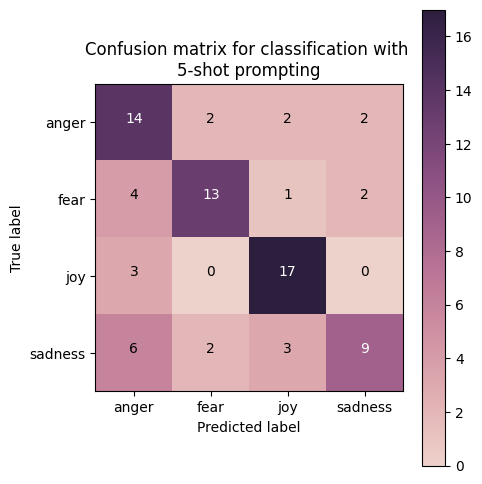

In [116]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [126]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time

# --- 1. 確保數據已載入 ---
if 'train_df' not in locals() or 'test_df' not in locals():
    print("正在重新載入數據...")
    try:
        train_df = pd.read_pickle("./data/train_df.pkl")
        test_df = pd.read_pickle("./data/test_df.pkl")
        print("數據載入完成。")
    except:
        print("錯誤：找不到數據檔案，請確保您已執行過 Lab 開頭的 Data Preparation 部分。")

# --- 2. 定義輔助函式 ---

# 定義情感標籤
emotions = ['anger', 'fear', 'joy', 'sadness']

# 定義輸出 Schema (使用 Enum 限制輸出只能是這四個詞)
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'

# 處理 Gemini API 速率限制的函式
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()
    if request_count == 0:
        first_request_time = current_time
    request_count += 1
    
    # 如果超過每分鐘限制 (Gemini Flash Lite 約 15 RPM)
    if request_count >= max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 65: # 設定 65 秒比較保險
            wait_time = 65 - elapsed_time
            print(f"達到速率限制 ({max_calls_per_min} RPM)，等待 {wait_time:.2f} 秒...")
            time.sleep(wait_time)
        request_count = 0 # 重置計數
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# 從數據集中採樣範例 (Few-Shot Examples)
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# 建立 Prompt
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0 and examples:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n"
                if num_shots == 1: break # 1-shot 只取一個
    return prompt

# 呼叫 LLM 進行分類 (含重試機制)
import time
import json

# 修改版的分類函式 (加入更強的錯誤處理與指數退避)
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    retry_count = 0
    current_wait_time = 10  # 初始等待時間 10 秒

    while not response or response not in classes:
        if retry_count > 5: # 增加重試次數上限
            print(f"  ❌ 放棄此樣本 (重試多次失敗): {test_text[:30]}...")
            return "unknown" # 回傳 unknown 避免程式卡死
            
        full_prompt = [f"{prompt_base}\nClassification:\nText: {test_text}\nClass: "]
        
        try:
            # 呼叫 Gemini
            result = prompt_gemini(input_prompt=full_prompt, schema=schema, system_instruction=system_prompt)
            
            # --- 修正重點 1: 檢查 result 是否為 None ---
            if result is None:
                print(f"  ⚠️ API 回傳 None (可能發生 429/503 錯誤). 等待 {current_wait_time} 秒後重試...")
                time.sleep(current_wait_time)
                current_wait_time *= 2  # 指數退避: 下次等待時間加倍
                retry_count += 1
                continue # 跳過這次迴圈，重新嘗試
            
            # --- 嘗試解析結果 ---
            # 如果 result 是空的字串
            if not result.strip():
                print(f"  ⚠️ API 回傳空字串. 重試中...")
                # 嘗試提高溫度重試一次
                result = prompt_gemini(input_prompt=full_prompt, schema=schema, system_instruction=system_prompt, temperature=1.0)
                if not result: 
                    retry_count += 1
                    continue

            try:
                response = json.loads(result) # 嘗試解析 JSON
            except:
                # 清理字串
                response = result.strip().replace('"', '').replace("'", "").lower() # 轉小寫以防萬一
                
        except Exception as e:
            print(f"  ⚠️ 發生未預期錯誤: {e}. 等待 {current_wait_time} 秒...")
            time.sleep(current_wait_time)
            current_wait_time *= 2
            retry_count += 1
            continue

        # 檢查回應是否在合法的類別中
        if response not in classes:
            print(f"  ⚠️ 無效的回應: '{response}'. 重試中...")
            retry_count += 1
            time.sleep(5) # 無效回應通常不需要等太久
            
    return response

# 繪製混淆矩陣
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            plt.text(k, i, format(cm[i, k], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, k] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# --- 主實驗函式 ---
def run_experiment(df_train, df_test, num_test_samples=20, num_shots=5):
    # 1. 準備 Prompt
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)

    system_prompt = "You are an emotion classification model. Classify according to the list of possible classes."
    
    results_data = []
    print(f"--- Running {num_shots}-shot Experiment ---")
    
    # 2. 準備測試數據 (每個情緒取 num_test_samples 個樣本)
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # 速率限制變數
    request_count = 0
    max_calls_per_min = 10 # 設保守一點
    first_request_time = None

    # 3. 開始分類迴圈
    for emotion in emotions:
        print(f"Processing emotion: {emotion}...")
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            
            # 檢查速率限制
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)
            
            # 呼叫 LLM
            predicted_emotion = classify_with_llm(test_text, prompt_base, system_prompt, emotions, Emotions)
            
            results_data.append({
                'text': test_text,
                'true_emotion': emotion,
                'predicted_emotion': predicted_emotion
            })

    # 4. 統計與儲存結果
    results_df = pd.DataFrame(results_data)
    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # 計算準確度
    accuracy = accuracy_score(results_df['true_emotion'], results_df['predicted_emotion'])
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # 繪製混淆矩陣
    cm = confusion_matrix(results_df['true_emotion'], results_df['predicted_emotion'], labels=emotions)
    plot_confusion_matrix(cm, classes=emotions, title=f'{num_shots}-shot Prompting')

--- Running 0-shot Experiment ---
Processing emotion: anger...
達到速率限制 (10 RPM)，等待 56.73 秒...
達到速率限制 (10 RPM)，等待 57.38 秒...
Processing emotion: fear...
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
  ⚠️ API 回傳 None (可能發生 429/503 錯誤). 等待 10 秒後重試...
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
  ⚠️ API 回傳 None (可能發生 429/503 錯誤). 等待 10 秒後重試...
達到速率限制 (10 RPM)，等待 29.38 秒...
達到速率限制 (10 RPM)，等待 56.38 秒...
Processing emotion: joy...
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
  ⚠️ API 回傳 None (可能發生 429/503 錯誤). 等待 10 秒後重試...
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'c

TypeError: cannot unpack non-iterable int object

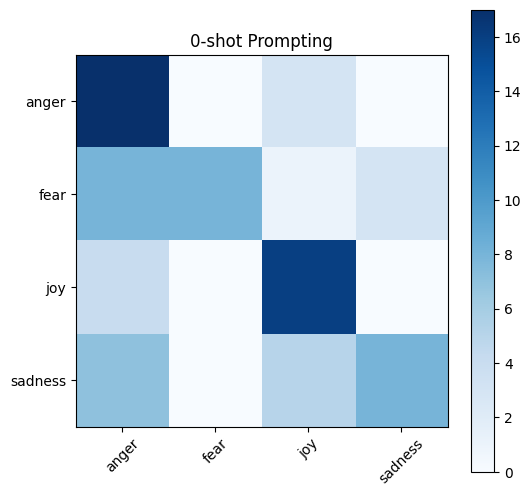

In [130]:
# 執行 Zero-shot
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)

--- Running 1-shot Experiment ---
Processing emotion: anger...
達到速率限制 (10 RPM)，等待 57.61 秒...
達到速率限制 (10 RPM)，等待 56.95 秒...
Processing emotion: fear...
達到速率限制 (10 RPM)，等待 56.68 秒...
達到速率限制 (10 RPM)，等待 56.81 秒...
Processing emotion: joy...
達到速率限制 (10 RPM)，等待 56.11 秒...
達到速率限制 (10 RPM)，等待 56.77 秒...
Processing emotion: sadness...
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
  ⚠️ API 回傳 None (可能發生 429/503 錯誤). 等待 10 秒後重試...
達到速率限制 (10 RPM)，等待 45.69 秒...
達到速率限制 (10 RPM)，等待 56.31 秒...

Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 65.00%


TypeError: cannot unpack non-iterable int object

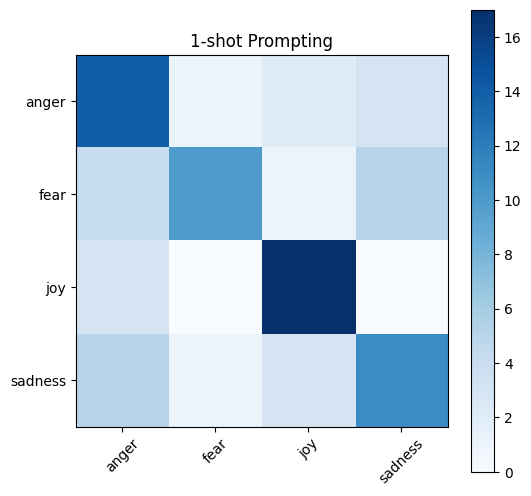

In [132]:
# 執行 1-shot
time.sleep(60) 
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)

--- Running 5-shot Experiment ---
Processing emotion: anger...
達到速率限制 (10 RPM)，等待 56.66 秒...
達到速率限制 (10 RPM)，等待 56.99 秒...
Processing emotion: fear...
達到速率限制 (10 RPM)，等待 57.33 秒...
達到速率限制 (10 RPM)，等待 58.07 秒...
Processing emotion: joy...
達到速率限制 (10 RPM)，等待 57.47 秒...
達到速率限制 (10 RPM)，等待 58.04 秒...
Processing emotion: sadness...
達到速率限制 (10 RPM)，等待 57.68 秒...
達到速率限制 (10 RPM)，等待 57.55 秒...

Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 68.75%


TypeError: cannot unpack non-iterable int object

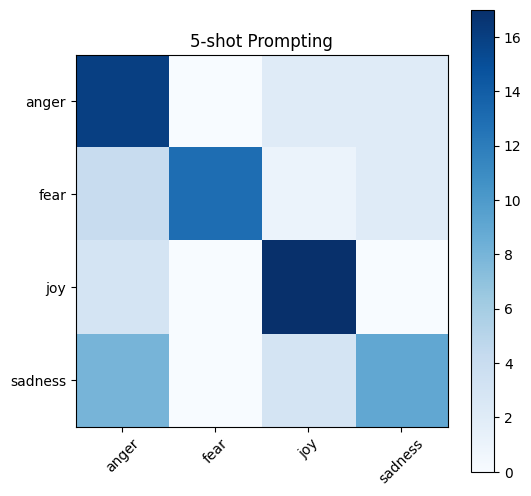

In [135]:
# 執行 5-shot 
time.sleep(60)
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [ ]:
# Answer here


---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---